In [1]:
import torch
from torchsummary import summary
from CNN import CNN
from Network import Network
from torch.utils.data import DataLoader
from torch.utils.data import random_split
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# mnist dataset
dataset = datasets.MNIST(
    root='data',
    train=True,
    download=True,
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,))
    ])
)
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

cnn = CNN().to(DEVICE)
summary(cnn, (1, 28, 28))
cnn.weight_init()

train_size = int(0.6 * len(dataset))
val_size = len(dataset) - train_size

training_set, validation_set = random_split(dataset, [train_size, val_size])

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 4, 28, 28]              40
              ReLU-2            [-1, 4, 28, 28]               0
         MaxPool2d-3            [-1, 4, 14, 14]               0
            Conv2d-4            [-1, 8, 14, 14]             296
              ReLU-5            [-1, 8, 14, 14]               0
         MaxPool2d-6              [-1, 8, 7, 7]               0
           Flatten-7                  [-1, 392]               0
            Linear-8                   [-1, 10]           3,930
           Softmax-9                   [-1, 10]               0
Total params: 4,266
Trainable params: 4,266
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.08
Params size (MB): 0.02
Estimated Total Size (MB): 0.10
-----------------------------------------------

In [3]:
epochs = 10
batch_size = 32

train_loader = DataLoader(training_set, batch_size=batch_size, shuffle=True, num_workers=4)
val_loader = DataLoader(validation_set, batch_size=batch_size, shuffle=True, num_workers=4)


optimizer = torch.optim.Adam(cnn.parameters(), lr=0.001)
criterion = torch.nn.CrossEntropyLoss()

In [4]:
cnn_df = pd.DataFrame(columns=['epoch', 'loss', 'accuracy'])

for epoch in range(epochs):
    cum_loss = 0
    print(f"Epoch {epoch + 1}\n-------------------------------")
    for i, (images, labels) in enumerate(train_loader):
        images = images.to(DEVICE)
        labels = labels.to(DEVICE)
        # Backward and optimize
        optimizer.zero_grad()
        # Forward pass
        outputs = cnn(images)
        loss = criterion(outputs, labels)
        cum_loss += loss.item()
        # Backward and optimize
        loss.backward()
        optimizer.step()

    with torch.no_grad():
        correct = 0
        total = 0
        for images, labels in val_loader:
            images = images.to(DEVICE)
            labels = labels.to(DEVICE)
            outputs = cnn(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print(f"Loss: {cum_loss / len(train_loader):.4f}, Accuracy: {100 * correct / total:.2f}%")
    cnn_df = pd.concat([cnn_df, pd.DataFrame([[epoch + 1, cum_loss / len(train_loader), 100 * correct / total]],
                                             columns=['epoch', 'loss', 'accuracy'])])

Epoch 1
-------------------------------
Loss: 1.6604, Accuracy: 94.47%
Epoch 2
-------------------------------
Loss: 1.5122, Accuracy: 96.25%
Epoch 3
-------------------------------
Loss: 1.5012, Accuracy: 96.18%
Epoch 4
-------------------------------
Loss: 1.4953, Accuracy: 97.03%
Epoch 5
-------------------------------
Loss: 1.4909, Accuracy: 97.22%
Epoch 6
-------------------------------
Loss: 1.4880, Accuracy: 97.30%
Epoch 7
-------------------------------
Loss: 1.4866, Accuracy: 97.09%
Epoch 8
-------------------------------
Loss: 1.4846, Accuracy: 96.93%
Epoch 9
-------------------------------
Loss: 1.4833, Accuracy: 97.37%
Epoch 10
-------------------------------
Loss: 1.4824, Accuracy: 97.67%


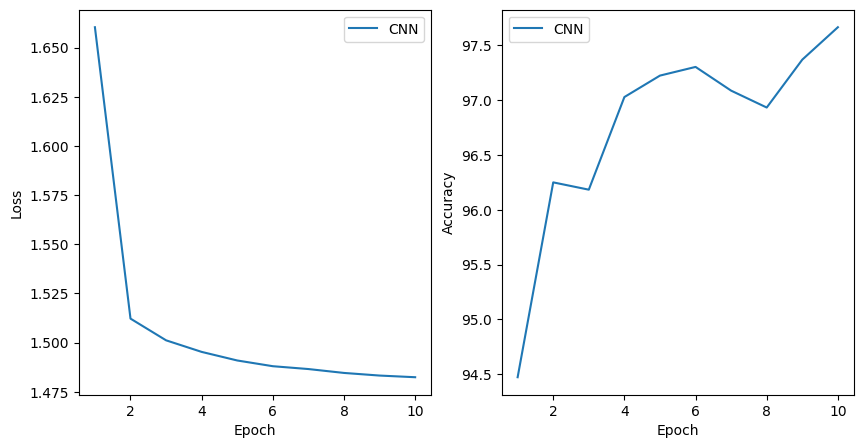

  epoch      loss   accuracy
0     1  1.660403  94.470833
0     2  1.512223  96.250000
0     3  1.501185  96.183333
0     4  1.495301  97.029167
0     5  1.490936  97.225000
0     6  1.488023  97.304167
0     7  1.486580  97.087500
0     8  1.484602  96.933333
0     9  1.483270  97.370833
0    10  1.482423  97.666667


In [5]:
# plot loss and accuracy
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(cnn_df['epoch'], cnn_df['loss'], label='CNN')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(cnn_df['epoch'], cnn_df['accuracy'], label='CNN')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
print(cnn_df)
cnn_df.to_csv('cnn.csv', index=False)

In [6]:
dataset = datasets.MNIST(
    root='data',
    train=True,
    download=True,
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,))
    ])
)
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

network = Network().to(DEVICE)
summary(network, (1, 28, 28))
network.weight_init()

train_size = int(0.2 * len(dataset))
val_size = len(dataset) - train_size

training_set, validation_set = random_split(dataset, [train_size, val_size])

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                  [-1, 392]         307,720
              ReLU-2                  [-1, 392]               0
            Linear-3                   [-1, 10]           3,930
           Softmax-4                   [-1, 10]               0
Total params: 311,650
Trainable params: 311,650
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.01
Params size (MB): 1.19
Estimated Total Size (MB): 1.20
----------------------------------------------------------------


c:\Users\jejah\Documents\test\Network.py:18: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self.softmax(self.fc2(x))


In [7]:
epochs = 10
batch_size = 32

train_loader = DataLoader(training_set, batch_size=batch_size, shuffle=True, num_workers=4)
val_loader = DataLoader(validation_set, batch_size=batch_size, shuffle=True, num_workers=4)


optimizer = torch.optim.Adam(network.parameters(), lr=0.001)
criterion = torch.nn.CrossEntropyLoss()

In [9]:
fcc_df = pd.DataFrame(columns=['epoch', 'loss', 'accuracy'])

for epoch in range(epochs):
    cum_loss = 0
    print(f"Epoch {epoch + 1}\n-------------------------------")
    for i, (images, labels) in enumerate(train_loader):
        images = images.to(DEVICE)
        labels = labels.to(DEVICE)
        # Backward and optimize
        optimizer.zero_grad()
        # Forward pass
        outputs = network(images)
        loss = criterion(outputs, labels)
        cum_loss += loss.item()
        # Backward and optimize
        loss.backward()
        optimizer.step()

    with torch.no_grad():
        correct = 0
        total = 0
        for images, labels in val_loader:
            images = images.to(DEVICE)
            labels = labels.to(DEVICE)
            outputs = network(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print(f"Loss: {cum_loss / len(train_loader):.4f}, Accuracy: {100 * correct / total:.2f}%")
    fcc_df = pd.concat([fcc_df, pd.DataFrame([[epoch + 1, cum_loss / len(train_loader), 100 * correct / total]],
                                             columns=['epoch', 'loss', 'accuracy'])]) 

Epoch 1
-------------------------------


c:\Users\jejah\Documents\test\Network.py:18: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self.softmax(self.fc2(x))


Loss: 1.6271, Accuracy: 90.85%
Epoch 2
-------------------------------
Loss: 1.5439, Accuracy: 92.44%
Epoch 3
-------------------------------
Loss: 1.5244, Accuracy: 92.99%
Epoch 4
-------------------------------
Loss: 1.5110, Accuracy: 94.80%
Epoch 5
-------------------------------
Loss: 1.5033, Accuracy: 94.60%
Epoch 6
-------------------------------
Loss: 1.4970, Accuracy: 94.72%
Epoch 7
-------------------------------
Loss: 1.4927, Accuracy: 94.97%
Epoch 8
-------------------------------
Loss: 1.4900, Accuracy: 95.07%
Epoch 9
-------------------------------
Loss: 1.4860, Accuracy: 95.10%
Epoch 10
-------------------------------
Loss: 1.4869, Accuracy: 95.28%


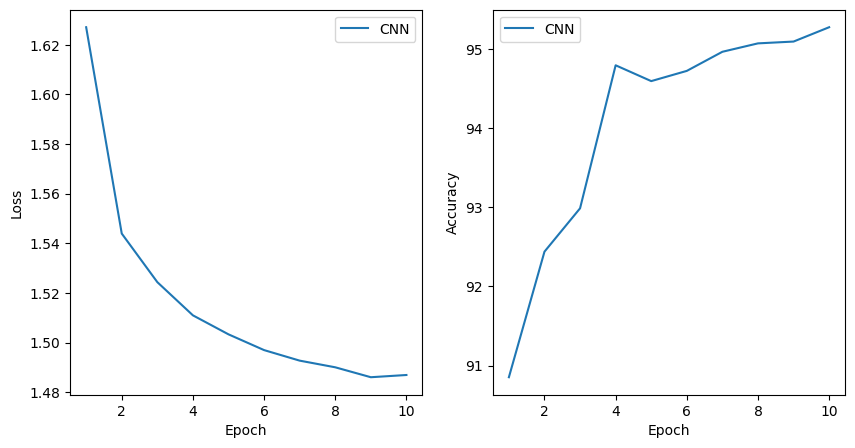

  epoch      loss   accuracy
0     1  1.627104  90.852083
0     2  1.543936  92.439583
0     3  1.524352  92.987500
0     4  1.510972  94.795833
0     5  1.503314  94.595833
0     6  1.496965  94.725000
0     7  1.492716  94.966667
0     8  1.490030  95.072917
0     9  1.486031  95.095833
0    10  1.486928  95.277083


In [10]:
# plot loss and accuracy
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(fcc_df['epoch'], fcc_df['loss'], label='CNN')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(fcc_df['epoch'], fcc_df['accuracy'], label='CNN')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
print(fcc_df)
fcc_df.to_csv('fcc.csv', index=False)

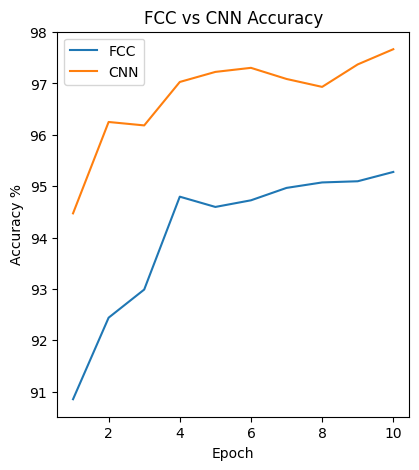

In [12]:
# plot fcc and cnn accuracy
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(fcc_df['epoch'], fcc_df['accuracy'], label='FCC')
plt.plot(cnn_df['epoch'], cnn_df['accuracy'], label='CNN')
plt.xlabel('Epoch')
plt.ylabel('Accuracy %')
plt.legend()
plt.title('FCC vs CNN Accuracy')

plt.savefig('fcc_vs_cnn_accuracy.png')